# Regressió lineal múltiple - Backward Elimination
--------------------

La tècnica d’eliminació cap enrere funciona agafant tote les variables independents per generar el model i anem eliminant-ne una a una mentre hi hagi alguna variable amb p-valor > a un cert un nivell de significació.
Passos:
* **PAS 1**: Establir el nivell de significació (SL/α) per estar dins el model (α <= 0.05)
* **PAS 2**: Calcular el model amb totes les possibles variables independents
* **PAS 3**: Agafem la variable independent amb el p-valor més gran  
    *Si p-valor > α llavors passem al PAS 4
    *Altrament passem al PAS 5 - Fi
* **PAS 4**: Eliminem la variable predictora que té el p-valor més gran i tornem a calcular el model 
* **PAS 5**: Fi


L'exemple que utilitzarem serà un data set que conté el benerfici de 50 startups d'EUS juntament amb les dades de despesa en diferents àmbits: I+D, Màrqueting, Administració i la seva localització.

En aquest exemple volem veure si el benefici depèn de totes les variable, d'unes quantes o de cap.
La lògica ens diu que si una startup gasta més en I+D segurament tindrà més benefici, però volem saber com influeix en el benefici la localitació i les despeses relacionades amb màrqueting i administració.

In [15]:
# Importem les llibreries necessàries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:

  
# Importem el dataset
df = pd.read_csv('dataset/50_Startups.csv')
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:

# Dividim el dataframe amb les variables independents (X) i les dependents (Y)
x = df[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = df['Profit']
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [10]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [9]:
# Construim les variables dummy a partir de la variable categòrica State
x = pd.get_dummies(x,columns=["State"],drop_first=True)
x.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [11]:
# Dividim el dataset amb dades de test i de train.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [12]:
print ("------\nTRAIN\n------")
print(x_train)
print(y_train)
print ("------\nTEST\n------")
print(x_test)
print(y_test)

------
TRAIN
------
    R&D Spend  Administration  Marketing Spend  State_Florida  State_New York
7   130298.13       145530.06        323876.68              1               0
14  119943.24       156547.42        256512.92              1               0
45    1000.23       124153.04          1903.93              0               1
48     542.05        51743.15             0.00              0               1
29   65605.48       153032.06        107138.38              0               1
15  114523.61       122616.84        261776.23              0               1
30   61994.48       115641.28         91131.24              1               0
32   63408.86       129219.61         46085.25              0               0
16   78013.11       121597.55        264346.06              0               0
42   23640.93        96189.63        148001.11              0               0
20   76253.86       113867.30        298664.47              0               0
43   15505.73       127382.30         35534.

In [17]:
# Ajustem el model de regressió lineal multiple
ls = LinearRegression()
ls.fit(x_train, y_train)

y_pred = ls.predict(x_test)
print(y_pred)
print ('---')
print(y_test)

[104282.76472172 132536.88499212 133910.85007766  72584.77489417
 179920.9276189  114549.31079234  66444.43261346  98404.96840122
 114499.82808602 169367.50639895  96522.6253998   88040.6718287
 110949.99405525  90419.1897851  128020.46250064]
---
28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
33     96778.92
35     96479.51
26    105733.54
34     96712.80
18    124266.90
Name: Profit, dtype: float64


In [19]:
x_train.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
7,130298.13,145530.06,323876.68,1,0
14,119943.24,156547.42,256512.92,1,0
45,1000.23,124153.04,1903.93,0,1
48,542.05,51743.15,0.00,0,1
29,65605.48,153032.06,107138.38,0,1


In [14]:
from sklearn.metrics import mean_squared_error, r2_score

# Mostrem els coeficent obtingut:
print('Coeficient \u03B21: %.5f' % regression.coef_)

# Valor del temre independent (X=0)
print('Terme independent \u03B20: %.5f' % regression.intercept_)

# Coeficient de R2
#print("Coeficient de determinació R^2:", regression.score(x, y))

# Error Quadràtic Mig (MSE)
print("MSE: %.4f" % mean_squared_error(y_test, y_pred, squared=True))

# Arrel de l'Error Quadràtic Mig (MSE)
print("RMSE: %.4f" % mean_squared_error(y_test, y_pred,squared=False))

# R-quadrat 
print('R-quadrat: %.5f' % r2_score(y_test, y_pred))


Coeficient β1: 1.52538
Terme independent β0: 30.89594
MSE: 3.5944
RMSE: 1.8959
R-quadrat: 0.95200


[Text(0.5, 0, 'y_test'), Text(0, 0.5, 'y_pred')]

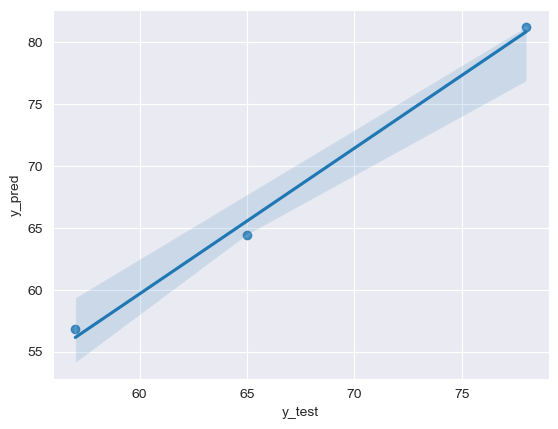

In [47]:
# Mostre ScatterPlot de y_pred i y_test
sns.set_style("darkgrid")
#sns.scatterplot(x=y_test, y=y_pred)
ax = sns.regplot(x=y_test, y=y_pred)
ax.set(xlabel='y_test', ylabel='y_pred')
